# Plot Rob Clayton's Hourly RMS values
Exploration of Rob Clayton's RMS dataset, filtered hourly

In [1]:
include("/Users/julianschmitt/Documents/Schoolwork/Seismology/SeisCore.jl/src/SeisCore.jl")
using .SeisCore, SeisIO, SeisNoise, Plots, Dates, CSV, DataFrames, JLD2, Statistics, Glob, ColorSchemes, 
            Plots.PlotUtils, HDF5, Images, Statistics, AbstractFFTs, DataFrames

σs = 0.5:0.1:2
normal_x = -5:0.01:5
normal_y = [exp.(-normal_x.^2 / (2σ^2)) / (2π * σ^2) for σ in σs];
loadcolorscheme(:cm_maxamp,ColorSchemes.gist_heat.colors[end-30:-1:1], "maxamp color", "for waveform plot");

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/Users/julianschmitt/.julia/packages/Plots/SjqWU/src/backends/hdf5.jl", 162, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000010fbf311f, Ptr{Nothing} @0x000000010fc8ceb3, Ptr{Nothing} @0x000000010fc8dfab, Ptr{Nothing} @0x000000010fc8c8df, Ptr{Nothing} @0x000000010fc8cbbc, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x000000010fca61ce, Ptr{Nothing} @0x000000010fca51b1, Ptr{Nothing} @0x000000010fca59d1, Ptr{Nothing} @0x000000010fca60d6, Ptr{Nothing} @0x000000010fc7eb6d, Ptr{Nothing} @0x000000010fca727c, Ptr{Nothing} @0x0000000116893d4f, Ptr{Nothing} @0x0000000138da537e, Ptr{Nothing} @0x000000010fc8dfcf, Ptr{Nothing} @0x000000010fc8c8df, Ptr{Nothing} @0x000000010fc8cbbc, Base.InterpreterIP in top-level CodeInfo for Plots at statement 10, Ptr{Nothing} @0x000000010fca61ce, Ptr{Nothing} @0x000000010fca7074, Ptr{Nothing} @0x

In [2]:
rootdir = "/Users/julianschmitt/Downloads/BASIN_calib/"
files = joinpath.(rootdir, readdir(rootdir)[2:end])
locations = DataFrame(CSV.File("/Users/julianschmitt/Downloads/updated_sources.csv"));

In [16]:
function get_robs_data(filename::String)
    """ Convert Rob's delimited files to dataframes"""
    df = DataFrame(CSV.File(filename, delim="    ", header = ["meta", "low_f", "med_f", "high_f"]))
    data = split.(df.meta, ' ')
    data = [[elt for elt in x if elt !=""] for x in data]
    pref = split(filename,"/")[end][2]
    df.name = [join(["$(pref)",convert(String, elt[1])]) for elt in data]
    df.channel = [convert(String, elt[2]) for elt in data]
    df.hour = [parse(Int64, elt[3]) for elt in data]
    try; df.low_f = parse.(Float64, df.low_f); catch ;end
    try; df.med_f = parse.(Float64, df.med_f); catch ;end
    try; df.high_f = parse.(Float64, df.high_f); catch ;end
    select!(df, Not(:meta))
    return df
end

get_robs_data (generic function with 1 method)

In [17]:
df = get_robs_data(files[1]);


In [18]:
df

,low_f,med_f,high_f,name,channel,hour
,Float64,Float64,Float64,String,String,Int64
1,1.4031,1.2336,4.5517,B403,EHE,1
2,1.41,1.6434,4.4426,B403,EHE,2
3,1.4035,1.0659,3.8151,B403,EHE,3
4,1.4209,1.0213,3.4872,B403,EHE,4
5,1.4534,0.97527,3.3586,B403,EHE,5
6,1.4933,0.84292,3.2238,B403,EHE,6
7,1.5448,0.7586,3.1358,B403,EHE,7
8,1.5786,0.68615,2.4651,B403,EHE,8
9,1.609,0.67272,2.5165,B403,EHE,9


In [19]:
function quantile_filter(ar::Array{Float64,1}, q::Array{Float64,1})
    q_lower, q_upper = quantile(ar, q[1]), quantile(ar, q[2])
    ar = [x for x in ar if ((x<=q_upper) && (x >=q_lower))]
    return ar
end
function mov_avg(amps::Array{Float64,1}, range::Int64=30) 
    avg, len = similar(amps), length(amps)
    for i =1:len
        first = max(1, convert(Int64, round(i-range/2)))
        last = min(len, convert(Int64, round(i+range/2)))
        window = amps[first:last]
        sd, mn = std(window), mean(window)
        avg[i] = mean(filter(x -> (x < mn + 3*sd) && (x > mn-3*sd), window))
    end
    df_new.moving_avg = avg
    return df_new
end
d = quantile_filter(b1002.high_f, [0.01,0.99])
scatter(collect(1:length(d)), d, xlabel="Hours since deployment", ylabel = "RMS", label=false,
        title="High Frequency RMS by Deployment Hour")

LoadError: [91mUndefVarError: b1002 not defined[39m

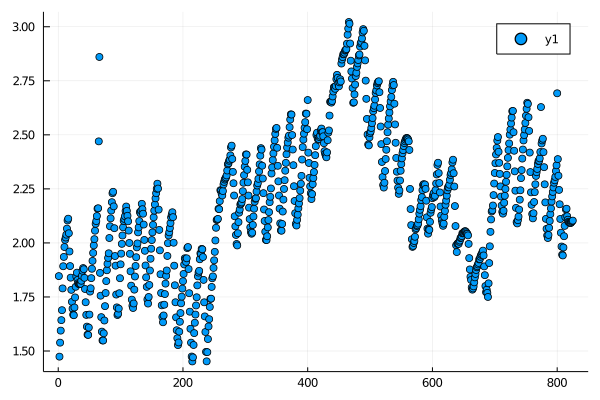

In [108]:
ar = quantile_filter(b1002.low_f, [0.01,0.99])
scatter(collect(1:length(ar)), ar)

In [20]:
function RMS_generator(df::DataFrame)
    RMS_df = DataFrame(name = String[], channel=String[],  rms_low=Float64[], 
        rms_med=Float64[], rms_high=Float64[])#header=["name", "channel", "rms_low", "rms_med", "rms_high"])
    names = Set(df.name)
    for elt in Iterators.product(names, ["EHE", "EHN","EHZ"])
        try
            name, chn = collect(elt)
            #geo = LLE_geo(name, locations)
            samp_df = filter(x-> x.name==name && x.channel==chn, df)
            l = mean(quantile_filter(samp_df.low_f, [0.05, 0.95]))
            m = mean(quantile_filter(samp_df.med_f, [0.05, 0.95]))
            h = mean(quantile_filter(samp_df.high_f, [0.05, 0.95]))
            push!(RMS_df, Dict("name"=> name, "channel"=> chn, 
                    "rms_low"=> l, "rms_med"=> m, "rms_high"=>h))
            catch e
        end
    end
    return RMS_df
end

RMS_generator (generic function with 1 method)

In [21]:
function LLE_geo2(station, df)
    """ Find station matching location and return geoloc object"""
    try
        row = df[(findfirst(x -> x==station, df.station)),:]
        lat, lon, el = row.latitude[1], row.longitude[1], row.elevation[1]
        geo = GeoLoc(lat = float(lat), lon = float(lon), el = float(el))
        return geo
    catch 
        try
            sta2 = "$(station[1:2])0$(station[3:end])"
            row = df[(findfirst(x -> x==sta2, df.station)),:]
            lat, lon, el = row.latitude[1], row.longitude[1], row.elevation[1]
            geo = GeoLoc(lat = float(lat), lon = float(lon), el = float(el))
            return geo
            catch e
            println(e)
        end
        return nothing
    end
end

LLE_geo2 (generic function with 1 method)

In [25]:
df = get_robs_data(files[1]);
RMS_df = RMS_generator(df)
for file in files[2:end]
    df2 = get_robs_data(file)
    df_calc = RMS_generator(df2)
    RMS_df = vcat(RMS_df, df_calc)
end

In [27]:
geos = [LLE_geo2(x, locations) for x in RMS_df.name]

MethodError(getindex, (1346×5 DataFrame
│ Row  │ network │ station │ latitude │ longitude │ elevation │
│      │ String  │ String  │ Float64  │ Float64   │ Int64     │
├──────┼─────────┼─────────┼──────────┼───────────┼───────────┤
│ 1    │ AZ      │ BZN     │ 33.4915  │ -116.667  │ 1301      │
│ 2    │ AZ      │ CPE     │ 32.8889  │ -117.105  │ 150       │
│ 3    │ AZ      │ CRY     │ 33.5654  │ -116.737  │ 1128      │
│ 4    │ AZ      │ FRD     │ 33.4947  │ -116.602  │ 1164      │
│ 5    │ AZ      │ KNW     │ 33.7141  │ -116.712  │ 1507      │
│ 6    │ AZ      │ LVA2    │ 33.3516  │ -116.561  │ 1435      │
│ 7    │ AZ      │ MONP2   │ 32.892   │ -116.422  │ 1875      │
│ 8    │ AZ      │ MTRP    │ 32.8203  │ -117.057  │ 200       │
│ 9    │ AZ      │ PFO     │ 33.6117  │ -116.459  │ 1259      │
│ 10   │ AZ      │ RDM     │ 33.63    │ -116.848  │ 1365      │
│ 11   │ AZ      │ SCI2    │ 32.915   │ -118.488  │ 486       │
│ 12   │ AZ      │ SMER    │ 33.4577  │ -117.171  │ 355       │


│ 247  │ CI      │ JNH2    │ 34.4489  │ -117.955  │ 1305      │
│ 248  │ CI      │ JPLS    │ 34.2053  │ -118.174  │ 465       │
│ 249  │ CI      │ JRC2    │ 35.9825  │ -117.809  │ 1469      │
│ 250  │ CI      │ JTH     │ 34.1264  │ -116.038  │ 606       │
│ 251  │ CI      │ JVA     │ 34.3662  │ -116.613  │ 904       │
│ 252  │ CI      │ KIK     │ 34.1504  │ -118.102  │ 237       │
│ 253  │ CI      │ KML     │ 33.5974  │ -117.879  │ 9         │
│ 254  │ CI      │ KYV     │ 33.9254  │ -116.173  │ 1498      │
│ 255  │ CI      │ LAF     │ 33.8689  │ -118.331  │ 20        │
│ 256  │ CI      │ LAT     │ 34.0445  │ -118.776  │ 351       │
│ 257  │ CI      │ LBW1    │ 33.798   │ -118.088  │ -16       │
│ 258  │ CI      │ LBW2    │ 33.798   │ -118.088  │ -16       │
│ 259  │ CI      │ LCG     │ 34.0003  │ -118.378  │ 108       │
│ 260  │ CI      │ LCP     │ 34.7355  │ -120.28   │ 199       │
│ 261  │ CI      │ LDF     │ 35.1307  │ -115.184  │ 1239      │
│ 262  │ CI      │ LDR     │ 34.9906  │ 

│ 376  │ CI      │ SBPX    │ 34.2324  │ -117.235  │ 1860      │
│ 377  │ CI      │ SCI2    │ 32.9799  │ -118.547  │ 199       │
│ 378  │ CI      │ SCZ2    │ 33.9954  │ -119.635  │ 440       │
│ 379  │ CI      │ SDD     │ 33.5526  │ -117.662  │ 120       │
│ 380  │ CI      │ SDG     │ 32.784   │ -117.138  │ 101       │
│ 381  │ CI      │ SDR     │ 32.7356  │ -116.942  │ 113       │
│ 382  │ CI      │ SES     │ 34.4369  │ -119.138  │ 480       │
│ 383  │ CI      │ SGL     │ 32.6493  │ -115.726  │ 75        │
│ 384  │ CI      │ SHO     │ 35.8995  │ -116.275  │ 451       │
│ 385  │ CI      │ SHO     │ 35.8996  │ -116.275  │ 451       │
│ 386  │ CI      │ SHU     │ 34.6428  │ -118.165  │ 774       │
│ 387  │ CI      │ SIL     │ 34.348   │ -116.827  │ 1698      │
│ 388  │ CI      │ SIL     │ 34.348   │ -116.827  │ 1698      │
│ 389  │ CI      │ SLA     │ 35.8909  │ -117.283  │ 1174      │
│ 390  │ CI      │ SLB     │ 33.4852  │ -115.866  │ 0         │
│ 391  │ CI      │ SLH     │ 33.1927  │ 

│ 620  │ NO      │ B234    │ 34.1106  │ -117.29   │ 325       │
│ 621  │ NO      │ B235    │ 34.1076  │ -117.29   │ 321       │
│ 622  │ NO      │ B236    │ 34.1058  │ -117.29   │ 318       │
│ 623  │ NO      │ B237    │ 34.1044  │ -117.29   │ 318       │
│ 624  │ NO      │ B239    │ 34.0994  │ -117.29   │ 309       │
│ 625  │ NO      │ B240    │ 34.0979  │ -117.291  │ 307       │
│ 626  │ NO      │ B241    │ 34.0952  │ -117.291  │ 306       │
│ 627  │ NO      │ B242    │ 34.0937  │ -117.29   │ 306       │
│ 628  │ NO      │ B243    │ 34.0917  │ -117.29   │ 304       │
│ 629  │ NO      │ B245    │ 34.0861  │ -117.289  │ 302       │
│ 630  │ NO      │ B246    │ 34.0841  │ -117.292  │ 302       │
│ 631  │ NO      │ B247    │ 34.0819  │ -117.29   │ 302       │
│ 632  │ NO      │ B249    │ 34.0776  │ -117.291  │ 301       │
│ 633  │ NO      │ B250    │ 34.0754  │ -117.291  │ 300       │
│ 634  │ NO      │ B251    │ 34.0742  │ -117.291  │ 300       │
│ 635  │ NO      │ B252    │ 34.0709  │ 

│ 856  │ NO      │ B5036   │ 34.1057  │ -117.437  │ 4195619   │
│ 857  │ NO      │ B5037   │ 34.1031  │ -117.435  │ 4195619   │
│ 858  │ NO      │ B5038   │ 34.1016  │ -117.437  │ 4195619   │
│ 859  │ NO      │ B5039   │ 34.0987  │ -117.434  │ 4195619   │
│ 860  │ NO      │ B5040   │ 34.0961  │ -117.437  │ 4195619   │
│ 861  │ NO      │ B5041   │ 34.094   │ -117.437  │ 4195619   │
│ 862  │ NO      │ B5043   │ 34.0884  │ -117.438  │ 4195619   │
│ 863  │ NO      │ B5044   │ 34.087   │ -117.437  │ 4195619   │
│ 864  │ NO      │ B5046   │ 34.0827  │ -117.438  │ 4195619   │
│ 865  │ NO      │ B5047   │ 34.0803  │ -117.435  │ 4195619   │
│ 866  │ NO      │ B5048   │ 34.0781  │ -117.436  │ 4195619   │
│ 867  │ NO      │ B5049   │ 34.0747  │ -117.435  │ 4195619   │
│ 868  │ NO      │ B5050   │ 34.0729  │ -117.437  │ 4195619   │
│ 869  │ NO      │ B5051   │ 34.0713  │ -117.437  │ 4195619   │
│ 870  │ NO      │ B5052   │ 34.0682  │ -117.436  │ 4195619   │
│ 871  │ NO      │ B5053   │ 34.066   │ 

│ 990  │ NO      │ G2020   │ 34.1166  │ -118.134  │ 187       │
│ 991  │ NO      │ G2021   │ 34.1144  │ -118.133  │ 181       │
│ 992  │ NO      │ G2022   │ 34.1126  │ -118.131  │ 174       │
│ 993  │ NO      │ G2023   │ 34.1102  │ -118.129  │ 169       │
│ 994  │ NO      │ G2024   │ 34.1086  │ -118.127  │ 164       │
│ 995  │ NO      │ G2025   │ 34.1062  │ -118.125  │ 159       │
│ 996  │ NO      │ G2026   │ 34.104   │ -118.123  │ 163       │
│ 997  │ NO      │ G2027   │ 34.1011  │ -118.121  │ 147       │
│ 998  │ NO      │ G2028   │ 34.0991  │ -118.119  │ 142       │
│ 999  │ NO      │ G2029   │ 34.097   │ -118.117  │ 138       │
│ 1000 │ NO      │ G2031   │ 34.0931  │ -118.111  │ 126       │
│ 1001 │ NO      │ G2032   │ 34.0906  │ -118.109  │ 122       │
│ 1002 │ NO      │ G2033   │ 34.0868  │ -118.11   │ 115       │
│ 1003 │ NO      │ G2034   │ 34.0858  │ -118.107  │ 114       │
│ 1004 │ NO      │ G2035   │ 34.0839  │ -118.105  │ 107       │
│ 1005 │ NO      │ G2036   │ 34.0817  │ 

│ 1120 │ NO      │ B1012   │ 34.1065  │ -118.138  │ 172       │
│ 1121 │ NO      │ B1013   │ 34.1064  │ -118.134  │ 169       │
│ 1122 │ NO      │ B1014   │ 34.1063  │ -118.131  │ 166       │
│ 1123 │ NO      │ B1015   │ 34.1065  │ -118.127  │ 164       │
│ 1124 │ NO      │ B1016   │ 34.107   │ -118.124  │ 161       │
│ 1125 │ NO      │ B1017   │ 34.1069  │ -118.121  │ 158       │
│ 1126 │ NO      │ B1018   │ 34.1072  │ -118.118  │ 155       │
│ 1127 │ NO      │ B1019   │ 34.1068  │ -118.114  │ 153       │
│ 1128 │ NO      │ B1020   │ 34.107   │ -118.11   │ 150       │
│ 1129 │ NO      │ B1021   │ 34.1069  │ -118.107  │ 148       │
│ 1130 │ NO      │ B1022   │ 34.1073  │ -118.105  │ 147       │
│ 1131 │ NO      │ B1023   │ 34.1069  │ -118.101  │ 146       │
│ 1132 │ NO      │ B1025   │ 34.1072  │ -118.093  │ 142       │
│ 1133 │ NO      │ B1026   │ 34.107   │ -118.09   │ 141       │
│ 1134 │ NO      │ B1027   │ 34.107   │ -118.088  │ 140       │
│ 1135 │ NO      │ B1028   │ 34.1072  │ 

MethodError(getindex, (1346×5 DataFrame
│ Row  │ network │ station │ latitude │ longitude │ elevation │
│      │ String  │ String  │ Float64  │ Float64   │ Int64     │
├──────┼─────────┼─────────┼──────────┼───────────┼───────────┤
│ 1    │ AZ      │ BZN     │ 33.4915  │ -116.667  │ 1301      │
│ 2    │ AZ      │ CPE     │ 32.8889  │ -117.105  │ 150       │
│ 3    │ AZ      │ CRY     │ 33.5654  │ -116.737  │ 1128      │
│ 4    │ AZ      │ FRD     │ 33.4947  │ -116.602  │ 1164      │
│ 5    │ AZ      │ KNW     │ 33.7141  │ -116.712  │ 1507      │
│ 6    │ AZ      │ LVA2    │ 33.3516  │ -116.561  │ 1435      │
│ 7    │ AZ      │ MONP2   │ 32.892   │ -116.422  │ 1875      │
│ 8    │ AZ      │ MTRP    │ 32.8203  │ -117.057  │ 200       │
│ 9    │ AZ      │ PFO     │ 33.6117  │ -116.459  │ 1259      │
│ 10   │ AZ      │ RDM     │ 33.63    │ -116.848  │ 1365      │
│ 11   │ AZ      │ SCI2    │ 32.915   │ -118.488  │ 486       │
│ 12   │ AZ      │ SMER    │ 33.4577  │ -117.171  │ 355       │


│ 246  │ CI      │ JEM     │ 33.081   │ -116.598  │ 1308      │
│ 247  │ CI      │ JNH2    │ 34.4489  │ -117.955  │ 1305      │
│ 248  │ CI      │ JPLS    │ 34.2053  │ -118.174  │ 465       │
│ 249  │ CI      │ JRC2    │ 35.9825  │ -117.809  │ 1469      │
│ 250  │ CI      │ JTH     │ 34.1264  │ -116.038  │ 606       │
│ 251  │ CI      │ JVA     │ 34.3662  │ -116.613  │ 904       │
│ 252  │ CI      │ KIK     │ 34.1504  │ -118.102  │ 237       │
│ 253  │ CI      │ KML     │ 33.5974  │ -117.879  │ 9         │
│ 254  │ CI      │ KYV     │ 33.9254  │ -116.173  │ 1498      │
│ 255  │ CI      │ LAF     │ 33.8689  │ -118.331  │ 20        │
│ 256  │ CI      │ LAT     │ 34.0445  │ -118.776  │ 351       │
│ 257  │ CI      │ LBW1    │ 33.798   │ -118.088  │ -16       │
│ 258  │ CI      │ LBW2    │ 33.798   │ -118.088  │ -16       │
│ 259  │ CI      │ LCG     │ 34.0003  │ -118.378  │ 108       │
│ 260  │ CI      │ LCP     │ 34.7355  │ -120.28   │ 199       │
│ 261  │ CI      │ LDF     │ 35.1307  │ 

│ 483  │ NC      │ MTU     │ 37.3532  │ -118.563  │ 1792      │
│ 484  │ NC      │ MYL     │ 37.3835  │ -120.421  │ 57        │
│ 485  │ NC      │ PBIB    │ 35.1614  │ -120.475  │ 522       │
│ 486  │ NC      │ PBM     │ 35.3944  │ -120.354  │ 1049      │
│ 487  │ NC      │ PCC     │ 36.0898  │ -121.164  │ 372       │
│ 488  │ NC      │ PHOB    │ 35.8666  │ -120.48   │ 796       │
│ 489  │ NC      │ PHSB    │ 35.824   │ -121.054  │ 475       │
│ 490  │ NC      │ PJU     │ 36.227   │ -120.594  │ 925       │
│ 491  │ NC      │ PKE     │ 36.061   │ -120.11   │ 244       │
│ 492  │ NC      │ PKY     │ 35.264   │ -120.667  │ 101       │
│ 493  │ NC      │ PML     │ 34.8947  │ -120.609  │ 468       │
│ 494  │ NC      │ PMPB    │ 36.2159  │ -120.801  │ 802       │
│ 495  │ NC      │ PSAB    │ 36.0249  │ -120.889  │ 150       │
│ 496  │ NC      │ PSM     │ 36.0688  │ -120.596  │ 957       │
│ 497  │ NC      │ PWM     │ 36.4327  │ -120.212  │ 45        │
│ 498  │ NN      │ BEN     │ 37.7154  │ 

│ 718  │ NO      │ B376    │ 33.9954  │ -117.523  │ 221       │
│ 719  │ NO      │ B378    │ 33.9913  │ -117.523  │ 217       │
│ 720  │ NO      │ B379    │ 33.9879  │ -117.523  │ 215       │
│ 721  │ NO      │ B380    │ 33.9862  │ -117.523  │ 214       │
│ 722  │ NO      │ B381    │ 33.9838  │ -117.523  │ 212       │
│ 723  │ NO      │ B382    │ 33.9816  │ -117.523  │ 209       │
│ 724  │ NO      │ B383    │ 33.9791  │ -117.523  │ 208       │
│ 725  │ NO      │ B384    │ 33.9764  │ -117.523  │ 206       │
│ 726  │ NO      │ B385    │ 33.9745  │ -117.523  │ 205       │
│ 727  │ NO      │ B386    │ 33.9721  │ -117.523  │ 205       │
│ 728  │ NO      │ B387    │ 33.9698  │ -117.523  │ 204       │
│ 729  │ NO      │ B4003   │ 34.1583  │ -117.647  │ 649       │
│ 730  │ NO      │ B4004   │ 34.1567  │ -117.649  │ 628       │
│ 731  │ NO      │ B4005   │ 34.1536  │ -117.648  │ 598       │
│ 732  │ NO      │ B4006   │ 34.1508  │ -117.648  │ 581       │
│ 733  │ NO      │ B4007   │ 34.1489  │ 

│ 847  │ NO      │ B5027   │ 34.1272  │ -117.436  │ 4195619   │
│ 848  │ NO      │ B5028   │ 34.1252  │ -117.436  │ 4195619   │
│ 849  │ NO      │ B5029   │ 34.1227  │ -117.436  │ 4195619   │
│ 850  │ NO      │ B5030   │ 34.1199  │ -117.436  │ 4195619   │
│ 851  │ NO      │ B5031   │ 34.1179  │ -117.436  │ 4195619   │
│ 852  │ NO      │ B5032   │ 34.1175  │ -117.437  │ 4195619   │
│ 853  │ NO      │ B5033   │ 34.1135  │ -117.436  │ 4195619   │
│ 854  │ NO      │ B5034   │ 34.1113  │ -117.436  │ 4195619   │
│ 855  │ NO      │ B5035   │ 34.1086  │ -117.437  │ 4195619   │
│ 856  │ NO      │ B5036   │ 34.1057  │ -117.437  │ 4195619   │
│ 857  │ NO      │ B5037   │ 34.1031  │ -117.435  │ 4195619   │
│ 858  │ NO      │ B5038   │ 34.1016  │ -117.437  │ 4195619   │
│ 859  │ NO      │ B5039   │ 34.0987  │ -117.434  │ 4195619   │
│ 860  │ NO      │ B5040   │ 34.0961  │ -117.437  │ 4195619   │
│ 861  │ NO      │ B5041   │ 34.094   │ -117.437  │ 4195619   │
│ 862  │ NO      │ B5043   │ 34.0884  │ 

│ 1100 │ ZY      │ MASS    │ 33.9866  │ -117.322  │ 0         │
│ 1101 │ ZY      │ STRA    │ 34.1251  │ -117.203  │ 0         │
│ 1102 │ ZY      │ BOTA    │ 34.113   │ -117.716  │ 0         │
│ 1103 │ ZY      │ CP01    │ 34.0463  │ -117.678  │ 0         │
│ 1104 │ ZY      │ CP02    │ 34.1126  │ -117.716  │ 0         │
│ 1105 │ ZY      │ CP03    │ 34.0481  │ -117.29   │ 0         │
│ 1106 │ ZY      │ CP04    │ 34.1251  │ -117.203  │ 0         │
│ 1107 │ ZY      │ CP05    │ 33.9865  │ -117.322  │ 0         │
│ 1108 │ ZY      │ CP06    │ 34.0546  │ -117.83   │ 0         │
│ 1109 │ NO      │ B1001   │ 34.1068  │ -118.175  │ 197       │
│ 1110 │ NO      │ B1002   │ 34.1072  │ -118.171  │ 195       │
│ 1111 │ NO      │ B1003   │ 34.1066  │ -118.168  │ 193       │
│ 1112 │ NO      │ B1004   │ 34.1069  │ -118.165  │ 190       │
│ 1113 │ NO      │ B1005   │ 34.1069  │ -118.161  │ 188       │
│ 1114 │ NO      │ B1006   │ 34.1074  │ -118.157  │ 186       │
│ 1115 │ NO      │ B1007   │ 34.1068  │ 

│ 1337 │ NO      │ B1249   │ 34.1063  │ -117.334  │ 346       │
│ 1338 │ NO      │ B1250   │ 34.1069  │ -117.33   │ 342       │
│ 1339 │ NO      │ B1251   │ 34.1081  │ -117.326  │ 340       │
│ 1340 │ NO      │ B1252   │ 34.1078  │ -117.322  │ 339       │
│ 1341 │ NO      │ B1254   │ 34.1075  │ -117.312  │ 336       │
│ 1342 │ NO      │ B1255   │ 34.1075  │ -117.314  │ 334       │
│ 1343 │ NO      │ B1256   │ 34.1079  │ -117.309  │ 333       │
│ 1344 │ NO      │ B1257   │ 34.1082  │ -117.306  │ 332       │
│ 1345 │ NO      │ B1259   │ 34.1082  │ -117.3    │ 328       │
│ 1346 │ NO      │ B1260   │ 34.1076  │ -117.297  │ 327       │, nothing, Colon()), 0x0000000000006e32)
MethodError(getindex, (1346×5 DataFrame
│ Row  │ network │ station │ latitude │ longitude │ elevation │
│      │ String  │ String  │ Float64  │ Float64   │ Int64     │
├──────┼─────────┼─────────┼──────────┼───────────┼───────────┤
│ 1    │ AZ      │ BZN     │ 33.4915  │ -116.667  │ 1301      │
│ 2    │ AZ      │ CPE  

│ 198  │ CI      │ ESI2    │ 33.6749  │ -117.326  │ 388       │
│ 199  │ CI      │ FDR     │ 35.6426  │ -118.934  │ 350       │
│ 200  │ CI      │ FHO     │ 34.0936  │ -116.936  │ 1614      │
│ 201  │ CI      │ FIG     │ 34.7283  │ -119.988  │ 945       │
│ 202  │ CI      │ FMO     │ 34.4092  │ -118.921  │ 137       │
│ 203  │ CI      │ FMP     │ 33.7126  │ -118.294  │ 89        │
│ 204  │ CI      │ FON     │ 34.0996  │ -117.439  │ 388       │
│ 205  │ CI      │ FOX2    │ 34.7339  │ -118.24   │ 719       │
│ 206  │ CI      │ FRK     │ 33.4021  │ -115.638  │ 60        │
│ 207  │ CI      │ FRM     │ 34.7752  │ -118.969  │ 2443      │
│ 208  │ CI      │ FUL     │ 33.8717  │ -117.923  │ 51        │
│ 209  │ CI      │ FUR     │ 36.467   │ -116.863  │ -37       │
│ 210  │ CI      │ FUR     │ 36.4672  │ -116.863  │ -38       │
│ 211  │ CI      │ GATR    │ 34.5527  │ -120.502  │ 590       │
│ 212  │ CI      │ GCC     │ 34.3276  │ -118.319  │ 726       │
│ 213  │ CI      │ GFF     │ 34.9238  │ 

│ 452  │ CI      │ WCS2    │ 36.0252  │ -117.765  │ 1143      │
│ 453  │ CI      │ WES     │ 32.759   │ -115.732  │ -8        │
│ 454  │ CI      │ WGR     │ 34.5108  │ -119.274  │ 554       │
│ 455  │ CI      │ WHF     │ 35.6951  │ -118.352  │ 859       │
│ 456  │ CI      │ WLH2    │ 36.1521  │ -118.313  │ 2672      │
│ 457  │ CI      │ WLS2    │ 34.579   │ -117.719  │ 889       │
│ 458  │ CI      │ WLT     │ 34.0095  │ -117.951  │ 107       │
│ 459  │ CI      │ WMD     │ 33.0383  │ -115.582  │ -45       │
│ 460  │ CI      │ WMF     │ 36.1176  │ -117.855  │ 1537      │
│ 461  │ CI      │ WNM     │ 35.8422  │ -117.906  │ 974       │
│ 462  │ CI      │ WNS     │ 34.115   │ -118.38   │ 306       │
│ 463  │ CI      │ WOR     │ 35.6956  │ -118.242  │ 795       │
│ 464  │ CI      │ WRC2    │ 35.9479  │ -117.65   │ 943       │
│ 465  │ CI      │ WRV2    │ 36.0077  │ -117.89   │ 1070      │
│ 466  │ CI      │ WSS     │ 34.1717  │ -118.65   │ 316       │
│ 467  │ CI      │ WTT2    │ 33.9487  │ 

│ 585  │ WR      │ CSP     │ 34.298   │ -117.358  │ 1239      │
│ 586  │ WR      │ FRI     │ 36.992   │ -119.708  │ 119       │
│ 587  │ WR      │ PEC     │ 33.892   │ -117.161  │ 582       │
│ 588  │ NO      │ B201    │ 34.1827  │ -117.288  │ 485       │
│ 589  │ NO      │ B202    │ 34.1802  │ -117.289  │ 455       │
│ 590  │ NO      │ B203    │ 34.1783  │ -117.289  │ 445       │
│ 591  │ NO      │ B204    │ 34.1767  │ -117.289  │ 433       │
│ 592  │ NO      │ B205    │ 34.1744  │ -117.289  │ 424       │
│ 593  │ NO      │ B206    │ 34.1721  │ -117.289  │ 413       │
│ 594  │ NO      │ B207    │ 34.1701  │ -117.29   │ 405       │
│ 595  │ NO      │ B208    │ 34.168   │ -117.289  │ 401       │
│ 596  │ NO      │ B209    │ 34.1653  │ -117.289  │ 401       │
│ 597  │ NO      │ B210    │ 34.1632  │ -117.289  │ 398       │
│ 598  │ NO      │ B211    │ 34.1606  │ -117.289  │ 394       │
│ 599  │ NO      │ B212    │ 34.1588  │ -117.29   │ 414       │
│ 600  │ NO      │ B213    │ 34.1569  │ 

│ 724  │ NO      │ B383    │ 33.9791  │ -117.523  │ 208       │
│ 725  │ NO      │ B384    │ 33.9764  │ -117.523  │ 206       │
│ 726  │ NO      │ B385    │ 33.9745  │ -117.523  │ 205       │
│ 727  │ NO      │ B386    │ 33.9721  │ -117.523  │ 205       │
│ 728  │ NO      │ B387    │ 33.9698  │ -117.523  │ 204       │
│ 729  │ NO      │ B4003   │ 34.1583  │ -117.647  │ 649       │
│ 730  │ NO      │ B4004   │ 34.1567  │ -117.649  │ 628       │
│ 731  │ NO      │ B4005   │ 34.1536  │ -117.648  │ 598       │
│ 732  │ NO      │ B4006   │ 34.1508  │ -117.648  │ 581       │
│ 733  │ NO      │ B4007   │ 34.1489  │ -117.648  │ 568       │
│ 734  │ NO      │ B4008   │ 34.1458  │ -117.647  │ 549       │
│ 735  │ NO      │ B4009   │ 34.1433  │ -117.648  │ 540       │
│ 736  │ NO      │ B4010   │ 34.1408  │ -117.647  │ 525       │
│ 737  │ NO      │ B4011   │ 34.1375  │ -117.648  │ 502       │
│ 738  │ NO      │ B4012   │ 34.1358  │ -117.647  │ 503       │
│ 739  │ NO      │ B4013   │ 34.1325  │ 

│ 976  │ NO      │ G2006   │ 34.1475  │ -118.162  │ 274       │
│ 977  │ NO      │ G2007   │ 34.1449  │ -118.16   │ 272       │
│ 978  │ NO      │ G2008   │ 34.1409  │ -118.157  │ 256       │
│ 979  │ NO      │ G2009   │ 34.1414  │ -118.156  │ 252       │
│ 980  │ NO      │ G2010   │ 34.1396  │ -118.156  │ 250       │
│ 981  │ NO      │ G2011   │ 34.1375  │ -118.153  │ 244       │
│ 982  │ NO      │ G2012   │ 34.135   │ -118.15   │ 238       │
│ 983  │ NO      │ G2013   │ 34.1322  │ -118.149  │ 234       │
│ 984  │ NO      │ G2014   │ 34.1311  │ -118.147  │ 232       │
│ 985  │ NO      │ G2015   │ 34.1289  │ -118.144  │ 233       │
│ 986  │ NO      │ G2016   │ 34.1256  │ -118.143  │ 226       │
│ 987  │ NO      │ G2017   │ 34.1233  │ -118.141  │ 224       │
│ 988  │ NO      │ G2018   │ 34.1211  │ -118.138  │ 217       │
│ 989  │ NO      │ G2019   │ 34.1189  │ -118.136  │ 208       │
│ 990  │ NO      │ G2020   │ 34.1166  │ -118.134  │ 187       │
│ 991  │ NO      │ G2021   │ 34.1144  │ 

│ 1228 │ NO      │ B1135   │ 34.1064  │ -117.72   │ 386       │
│ 1229 │ NO      │ B1136   │ 34.1069  │ -117.717  │ 390       │
│ 1230 │ NO      │ B1137   │ 34.1068  │ -117.713  │ 394       │
│ 1231 │ NO      │ B1138   │ 34.1068  │ -117.71   │ 399       │
│ 1232 │ NO      │ B1139   │ 34.1066  │ -117.707  │ 403       │
│ 1233 │ NO      │ B1140   │ 34.1071  │ -117.703  │ 407       │
│ 1234 │ NO      │ B1141   │ 34.1069  │ -117.7    │ 408       │
│ 1235 │ NO      │ B1142   │ 34.1073  │ -117.697  │ 409       │
│ 1236 │ NO      │ B1143   │ 34.1069  │ -117.694  │ 409       │
│ 1237 │ NO      │ B1144   │ 34.107   │ -117.69   │ 410       │
│ 1238 │ NO      │ B1145   │ 34.1069  │ -117.686  │ 411       │
│ 1239 │ NO      │ B1146   │ 34.107   │ -117.683  │ 412       │
│ 1240 │ NO      │ B1147   │ 34.1067  │ -117.68   │ 413       │
│ 1241 │ NO      │ B1148   │ 34.1067  │ -117.676  │ 413       │
│ 1242 │ NO      │ B1149   │ 34.1068  │ -117.673  │ 414       │
│ 1243 │ NO      │ B1150   │ 34.1067  │ 

2116-element Array{Union{Nothing, GeoLoc},1}:
 GeoLoc with fields:
datum: 
  lat: 34.106767
  lon: -118.05625
   el: 121.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.108333
  lon: -118.016111
   el: 108.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.112778
  lon: -117.991389
   el: 116.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.1072
  lon: -117.761
   el: 322.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.10754
  lon: -117.31174
   el: 336.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.1069
  lon: -117.639117
   el: 400.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.106944
  lon: -117.906111
   el: 153.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.106883
  lon: -118.066983
   el: 128.0
  dep: 0.0
   az: 0.0
  inc: 0.0

 GeoLoc with fields:
datum: 
  lat: 34.10684
  lon: -117.86649
   el

In [28]:
lats = [x==nothing ? 0 : x.lat for x in geos]
lons = [x==nothing ? 0 : x.lon for x in geos]
RMS_df.lon = lons
RMS_df.lat = lats
RMS_df

,name,channel,rms_low,rms_med,rms_high,lon,lat
,String,String,Float64,Float64,Float64,Real,Real
1,B1036,EHE,3.07165,1.80606,6.25218,-118.056,34.1068
2,B1049,EHE,3.08803,2.4337,9.60125,-118.016,34.1083
3,B1055,EHE,2.59276,2.03092,8.60546,-117.991,34.1128
4,B1119,EHE,4.32261,0.68744,3.16851,-117.761,34.1072
5,B1254,EHE,2.9839,5.43912,31.3658,-117.312,34.1075
6,B1159,EHE,2.84516,2.60573,2.63052,-117.639,34.1069
7,B1080,EHE,3.57689,1.13573,4.87423,-117.906,34.1069
8,B1033,EHE,3.29022,1.61088,5.71802,-118.067,34.1069
9,B1092,EHE,3.2074,0.920637,3.07227,-117.866,34.1068


In [29]:
d = [x < 8 ? x : 8 for x in RMS_df.rms_low]
heatplot= Plots.scatter(RMS_df.lon,RMS_df.lat, marker_z = d, ylims=(33.9,34.2), xlims=(-118.2,-117.15), 
    markerstrokewidth=0, markersize=5, color = :cm_maxamp, colorbar_title="RMS low (<1.0 Hz)",
    title="RMS for Rob's Data (low frequency)", ylabel= "Latitude", xlabel="Longitude", 
        label="Nodes",legend = :bottomright)
plot!(dpi=300)
png("/Users/julianschmitt/Desktop/SeisPlots2/Rob_RMS_wB4.png")

In [30]:
median(filter(x -> occursin("B1", x.name), RMS_df).rms_low)
#std(filter(x -> occursin("B1", x.name), RMS_df).rms_low)



3.388688766660265

In [31]:
median(filter(x -> occursin("B3", x.name), RMS_df).rms_low)



1.1885107498435652

In [32]:
median(filter(x -> occursin("B4", x.name), RMS_df).rms_low)



1.9454813694779904

In [40]:
low, med, high = Dict(), Dict(), Dict()
lsd, msd, hsd = Dict(), Dict(), Dict()
for line in Set([convert(String, elt[1:2]) for elt in RMS_df.name])
    subdf = filter(x -> occursin(line, x.name), RMS_df)
    lg = median(subdf.rms_low)
    lm = median(subdf.rms_med)
    lh = median(subdf.rms_high)
    low[line],med[line],high[line] = lg, lm, lh
    lsd[line],msd[line],hsd[line] = std(quantile_filter(subdf.rms_low, [0., 0.95])), std(quantile_filter(subdf.rms_med, [0., 0.95])),
            std(quantile_filter(subdf.rms_high, [0., 0.95]))#std(subdf.rms_med), std(subdf.rms_high)
end

In [41]:
lsd

Dict{Any,Any} with 10 entries:
  "B3" => 1.5881
  "G3" => 0.887905
  "B6" => 0.379826
  "G4" => 1.14611
  "G1" => 0.214611
  "B2" => 1.02236
  "B1" => 1.42325
  "G2" => 0.266443
  "B5" => 1.07156
  "B4" => 0.259141

Dict{Any,Any}("B3" => 1.1885107498435652,"G3" => 2.20795602700138,"B6" => 0.5820337003841229,"G4" => 2.895664933687003,"G1" => 1.7782005481283423,"B2" => 1.5923312096229376,"B1" => 3.388688766660265,"G2" => 1.8480375082080664,"B5" => 2.4609589296848453,"B4" => 1.9454813694779904)


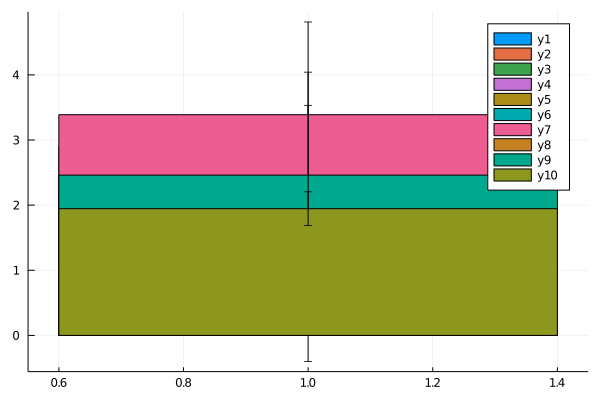

In [78]:
bardf = DataFrame(low)
push!(bardf,lsd)
lows= vec(convert(Array, bardf[1,:]))
low_stds = vec(convert(Array, bardf[2,:]))
println(low)
bar_plot = bar()

for (ind, line) in enumerate(keys(low))
    bar!(bar_plot, [low[line]], yerr = lsd[line])#, ribbon=1)#ribbon=(low_stds, low_stds))
end
bar_plot

In [103]:
# make histogram plots for low, medium, and high rms frequency content
for line in Set([convert(String, elt[1:2]) for elt in RMS_df.name])
    subdf = filter(x -> occursin(line, x.name), RMS_df)
    rl = [elt < 10 ? elt : 10 for elt in subdf.rms_low]
    rm = [elt < 10 ? elt : 10 for elt in subdf.rms_med]
    rh = [elt < 10 ? elt : 10 for elt in subdf.rms_high]
    h_plot = histogram(title= "$line RMS frequency histogram", alpha=0.5, xlims = (0,10),
        dpi = 200)
    colors = ["green", "orange", "red"]
    labels = ["low frequency", "med frequency", "high frequency"]
    # add all colors to the same plot 
    for (ind, ar) in enumerate([rl, rm, rh])
        histogram!(h_plot, ar, color=colors[ind], alpha=0.5, label=labels[ind], bins = collect(0:0.333:10))
    end
    png(h_plot, "/Users/julianschmitt/Desktop/SeisPlots2/$(line)_RMS_all_histogram.png")
    
    # make individual plots 
    plf = histogram(rl, title= "$line RMS low frequency histogram", alpha=0.5, xlims = (0,10), label = "low freq",
        dpi = 200, xlabel="Hourly RMS", ylabel="Frequency", color="green", bins = collect(0:0.333:10))
    pmf = histogram(rm, title= "$line RMS medium frequency histogram", alpha=0.5, xlims = (0,10), label="med freq",
        dpi = 200, xlabel="Hourly RMS", ylabel="Frequency", color = "orange", bins = collect(0:0.333:10))
    phf = histogram(rh, title= "$line RMS high frequency histogram", alpha=0.5, xlims = (0,10), label="high freq",
        dpi = 200, xlabel="Hourly RMS", ylabel="Frequency", color="red", bins = collect(0:0.333:10))
    png(plf, "/Users/julianschmitt/Desktop/SeisPlots2/$(line)_RMS_lf_histogram.png")
    png(pmf, "/Users/julianschmitt/Desktop/SeisPlots2/$(line)_RMS_mf_histogram.png")
    png(phf, "/Users/julianschmitt/Desktop/SeisPlots2/$(line)_RMS_hf_histogram.png")
end

In [75]:
keys(low)

Base.KeySet for a Dict{Any,Any} with 10 entries. Keys:
  "B3"
  "G3"
  "B6"
  "G4"
  "G1"
  "B2"
  "B1"
  "G2"
  "B5"
  "B4"